## Data Merging

1) Pregnancies- Hormonal changes during pregnancy can affect insulin sensitivity, especially in women with multiple pregnancies.

2) Blood Glucose Level-  High blood sugar levels occur due to insulin resistance or insufficient insulin production - traits of diabetes.

3) Blood Pressure - Hypertension can damage blood vessels - diabetes, such as kidney disease and retinopathy.

4) Skin Thickness- Excess body fat, especially visceral fat, is a risk factor for insulin resistance and type 2 diabetes.

5) Insulin - Low insulin levels suggest diabetes type 1- point to type 2 diabetes.

6) BMI (Body Mass Index)- Excess weight, especially around the abdomen, promotes insulin resistance.

7) Diabetes Pedigree Function- A higher value suggests a stronger family history and genetic risk for developing diabetes.

8) Age- Insulin production and sensitivity decline with age, increasing diabetes risk.

9) Hypertension- diabetes-related complications, particularly cardiovascular disease.

10) Heart Disease - Diabetes accelerates atherosclerosis and other cardiac issues due to vascular damage.

11) Smoking History- Nicotine reduces insulin sensitivity, and smoking promotes inflammation.

12) HbA1c Level- High HbA1c levels confirm poor glucose regulation and increased risk of complications.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
pima = pd.read_csv("/content/PIMA Indians Diabetes (PID) dataset.csv")  # PIMA Indians dataset
diabetes_pred_data = pd.read_csv("/content/diabetes_prediction_dataset.csv")  # Diabetes Prediction Dataset

# Standardizing column names for consistency
pima.rename(columns={'Outcome': 'diabetes', 'Glucose': 'blood_glucose_level'}, inplace=True)

# Map smoking_history to numeric categories
smoking_map = {
    'never': 0, 'former': 1, 'current': 2,
    'No Info': 3, 'not current': 4, 'ever': 5
}
diabetes_pred_data['smoking_history'] = diabetes_pred_data['smoking_history'].map(smoking_map)

# Selecting relevant columns to merge
pima_features = ['Pregnancies', 'blood_glucose_level', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'diabetes']

diabetes_pred_data_features = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
                                'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

# Ensure both datasets have common columns named correctly
pima = pima[pima_features]
diabetes_pred_data = diabetes_pred_data[diabetes_pred_data_features]

# Rename overlapping columns for alignment
diabetes_pred_data.rename(columns={'age': 'Age', 'bmi': 'BMI'}, inplace=True)

# Merge datasets
combined = pd.concat([pima, diabetes_pred_data], axis=0, ignore_index=True)


# Drop the 'gender' column from the combined dataset
combined = combined.drop(columns=['gender'])

# Handle missing values for numeric columns by filling with the mean
numeric_columns = combined.select_dtypes(include=['number']).columns
combined[numeric_columns] = combined[numeric_columns].fillna(combined[numeric_columns].mean())

# Verify the combined dataset
print(combined.info())  # Check data types and missing values
print(combined.head())  # Preview data

# Save the combined dataset
combined.to_csv("diabetes_dataset.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               102000 non-null  float64
 1   blood_glucose_level       102000 non-null  int64  
 2   BloodPressure             102000 non-null  float64
 3   SkinThickness             102000 non-null  float64
 4   Insulin                   102000 non-null  float64
 5   BMI                       102000 non-null  float64
 6   DiabetesPedigreeFunction  102000 non-null  float64
 7   Age                       102000 non-null  float64
 8   diabetes                  102000 non-null  int64  
 9   hypertension              102000 non-null  float64
 10  heart_disease             102000 non-null  float64
 11  smoking_history           102000 non-null  float64
 12  HbA1c_level               102000 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 10.1 

In [3]:
data= pd.read_csv("/content/diabetes_dataset.csv")
data.head(5)

,Pregnancies,blood_glucose_level,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes,hypertension,heart_disease,smoking_history,HbA1c_level
0,2.0,138,62.0,35.0,0.0,33.6,0.127,47.0,1,0.07485,0.03942,1.8118,5.527507
1,0.0,84,82.0,31.0,125.0,38.2,0.233,23.0,0,0.07485,0.03942,1.8118,5.527507
2,0.0,145,0.0,0.0,0.0,44.2,0.630,31.0,1,0.07485,0.03942,1.8118,5.527507
3,0.0,135,68.0,42.0,250.0,42.3,0.365,24.0,1,0.07485,0.03942,1.8118,5.527507
4,1.0,139,62.0,41.0,480.0,40.7,0.536,21.0,0,0.07485,0.03942,1.8118,5.527507


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102000 entries, 0 to 101999
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               102000 non-null  float64
 1   blood_glucose_level       102000 non-null  int64  
 2   BloodPressure             102000 non-null  float64
 3   SkinThickness             102000 non-null  float64
 4   Insulin                   102000 non-null  float64
 5   BMI                       102000 non-null  float64
 6   DiabetesPedigreeFunction  102000 non-null  float64
 7   Age                       102000 non-null  float64
 8   diabetes                  102000 non-null  int64  
 9   hypertension              102000 non-null  float64
 10  heart_disease             102000 non-null  float64
 11  smoking_history           102000 non-null  float64
 12  HbA1c_level               102000 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 10.1 

In [5]:
# Check the missing values
data.isnull().sum()

,0
Pregnancies,0
blood_glucose_level,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
diabetes,0
hypertension,0


In [6]:
# Check for duplicates and display them
duplicates = data[data.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicates)

# Count the number of duplicates
num_duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {num_duplicates}")

# Remove duplicates
data_no_duplicates = data.drop_duplicates()
#print("\nDataFrame after removing duplicates:")
print(data_no_duplicates)

Duplicate Rows:
        Pregnancies  blood_glucose_level  BloodPressure  SkinThickness  \
1            0.0000                   84        82.0000         31.000   
2            0.0000                  145         0.0000          0.000   
3            0.0000                  135        68.0000         42.000   
4            1.0000                  139        62.0000         41.000   
5            0.0000                  173        78.0000         32.000   
...             ...                  ...            ...            ...   
101980       3.7035                  145        69.1455         20.935   
101985       3.7035                  145        69.1455         20.935   
101989       3.7035                  158        69.1455         20.935   
101990       3.7035                  100        69.1455         20.935   
101995       3.7035                   90        69.1455         20.935   

        Insulin    BMI  DiabetesPedigreeFunction   Age  diabetes  \
1       125.000  38.20     

In [7]:
print(data['diabetes'].value_counts())

diabetes
0    92816
1     9184
Name: count, dtype: int64


diabetes column distribution indicates a class imbalance in your dataset:

Non-diabetic (0):92816 samples
Diabetic (1):  9184 samples

This significant imbalance between the two classes can affect the performance of machine learning models. Most models tend to be biased toward predicting the majority class (in this case, non-diabetic), which may lead to poor performance in detecting the minority class (diabetic cases).

Correlations with diabetes:
diabetes                    1.000000
blood_glucose_level         0.406180
HbA1c_level                 0.386517
Age                         0.245118
BMI                         0.226179
hypertension                0.190840
heart_disease               0.165665
Pregnancies                 0.052084
DiabetesPedigreeFunction    0.036077
Insulin                     0.028062
SkinThickness               0.017646
BloodPressure               0.017627
smoking_history            -0.053882
Name: diabetes, dtype: float64


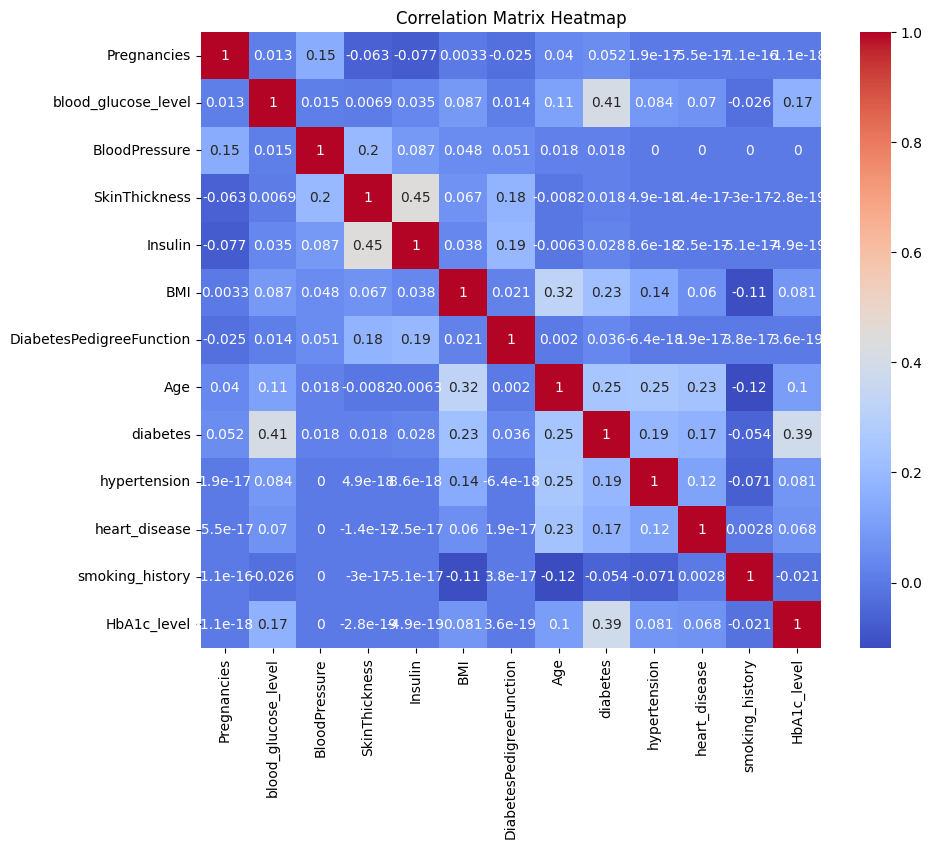

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = data.corr()

# Extract correlations with the 'diabetes' target variable
correlation_with_diabetes = correlation_matrix['diabetes'].sort_values(ascending=False)

# Print correlations
print("Correlations with diabetes:")
print(correlation_with_diabetes)

# Plot heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()


Focus on features with higher correlations like blood_glucose_level, HbA1c_level, BMI, Age, hypertension, and heart_disease

### Feature Engineering and preprocessing

These steps aim to enhance the dataset's quality by reducing dimensionality, creating informative features, and standardizing data, which are crucial for improving model performance

In [9]:
import numpy as np
import pandas as pd # Import pandas

# Averaging two correlated features
data['composite_feature'] = (data['blood_glucose_level'] + data['HbA1c_level']) / 2

# PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
data['pca_feature'] = pca.fit_transform(data[['blood_glucose_level', 'HbA1c_level']])

data['BMI_Age'] = data['BMI'] * data['Age']
data['glucose_hba1c_ratio'] = data['blood_glucose_level'] / data['HbA1c_level']

data['log_insulin'] = np.log1p(data['Insulin'])


# Define numeric_columns
numeric_columns = ['Pregnancies', 'blood_glucose_level', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','HbA1c_level','composite_feature', 'pca_feature', 'BMI_Age', 'glucose_hba1c_ratio', 'log_insulin']  # Replace with the actual numeric columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [10]:
data.head()

,Pregnancies,blood_glucose_level,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,diabetes,hypertension,heart_disease,smoking_history,HbA1c_level,composite_feature,pca_feature,BMI_Age,glucose_hba1c_ratio,log_insulin
0,-3.680651,0.006716,-2.660048,6.239073,-5.156222,0.922418,-7.593096,0.236124,1,0.07485,0.03942,1.8118,8.378109e-16,0.006685,0.006716,0.546136,-0.090188,-10.099891
1,-8.001933,-1.322562,4.785332,4.464719,2.874876,1.608596,-5.252887,-0.835827,0,0.07485,0.03942,1.8118,8.378109e-16,-1.316445,-1.322538,-0.442829,-1.211020,1.101559
2,-8.001933,0.179030,-25.740725,-9.286527,-5.156222,2.503612,3.511859,-0.478510,1,0.07485,0.03942,1.8118,8.378109e-16,0.178202,0.179027,0.251112,0.055105,-10.099891
3,-8.001933,-0.067133,-0.426434,9.344193,10.905975,2.220190,-2.338664,-0.791162,1,0.07485,0.03942,1.8118,8.378109e-16,-0.066822,-0.067131,-0.250005,-0.152457,2.697768
4,-5.841292,0.031332,-2.660048,8.900605,25.683196,1.981520,1.436579,-0.925156,0,0.07485,0.03942,1.8118,8.378109e-16,0.031187,0.031332,-0.476566,-0.069432,4.204211


##Split the dataset
Before applying SMOTE, first split the dataset into training and testing set 80% training set and a 20 test set split is used.

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split your data
X = data.drop(columns=['diabetes'])  # Features
y = data['diabetes']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X.isnull().sum()

,0
Pregnancies,0
blood_glucose_level,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
hypertension,0
heart_disease,0


## Resampling Techniques:
Over-sampling the minority class (diabetic cases) using techniques like SMOTE (Synthetic Minority Over-sampling Technique)

which generates synthetic samples to balance the class distribution.

In [13]:
# Apply SMOTE only on the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(y_train_resampled.value_counts())

diabetes
0    74279
1    74279
Name: count, dtype: int64


##Model Training

## Logistic regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

## Evaluate the model

In [15]:
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18537
           1       0.43      0.88      0.58      1863

    accuracy                           0.88     20400
   macro avg       0.71      0.88      0.76     20400
weighted avg       0.94      0.88      0.90     20400



## Confusion matrix for Logistic Regression

Confusion Matrix for Logistic Regression:
[[16400  2137]
 [  219  1644]]


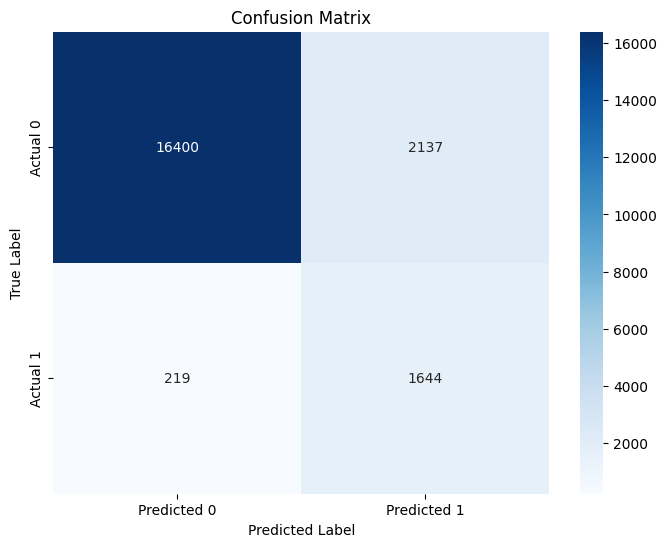

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix for Logistic Regression:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

True Negatives (16400): The number of healthy people (class 0) correctly identified as not having diabetes.

False Positives (2137): Healthy people incorrectly identified as having diabetes (Type I error).

False Negatives (219): People with diabetes incorrectly identified as healthy (Type II error).

True Positives (1644): People with diabetes correctly identified as having diabetes

Hyper Parameter Tuning for Logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
}


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced']},
             scoring='f1')

In [56]:
# Initialize the model
log_reg = LogisticRegression(solver='liblinear', max_iter=500)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='f1',  # Focus on F1-Score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Fit to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 10, 'class_weight': None}
Confusion Matrix:
 [[16401  2136]
 [  219  1644]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18537
           1       0.43      0.88      0.58      1863

    accuracy                           0.88     20400
   macro avg       0.71      0.88      0.76     20400
weighted avg       0.94      0.88      0.90     20400



The logistic regression model with the best-tuned parameters (C = 10, class_weight=None) achieves strong recall for the diabetic class, which is essential for minimizing missed diagnoses.
However, the low precision suggests that the model could still benefit from further optimization, especially to reduce false positives.


XG BOOST Classifier

In [17]:
# Import XGBClassifier
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18537
           1       0.89      0.73      0.80      1863

    accuracy                           0.97     20400
   macro avg       0.93      0.86      0.89     20400
weighted avg       0.97      0.97      0.97     20400



In [18]:
from sklearn.metrics import roc_auc_score

# Example for XGBoost
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"AUC-ROC Score for XGBoost: {roc_auc}")

AUC-ROC Score for XGBoost: 0.9779295625284805


Confusion Matrix for XGBoost:
[[18369   168]
 [  511  1352]]


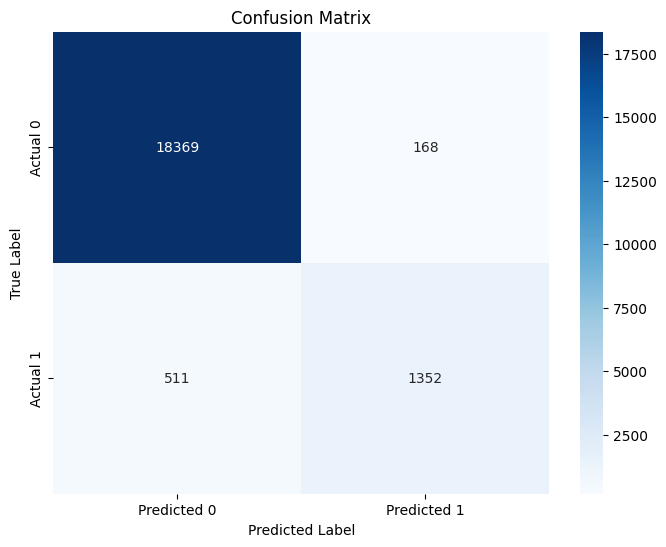

In [19]:
cm = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(XGBClassifier(eval_metric='logloss', use_label_encoder=False), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:45:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best Score: 0.9972999810840003


Confusion Matrix after Threshold Adjustment:
[[17991   546]
 [  377  1486]]


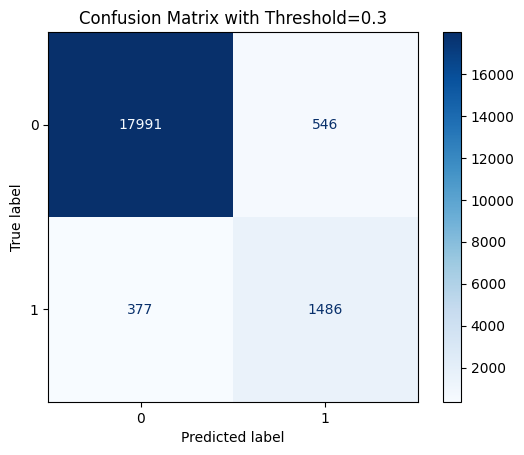

Classification Report with Adjusted Threshold:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18537
           1       0.73      0.80      0.76      1863

    accuracy                           0.95     20400
   macro avg       0.86      0.88      0.87     20400
weighted avg       0.96      0.95      0.96     20400



In [22]:
# Generate probabilities
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Adjust decision threshold
threshold = 0.3  # Experiment with different values
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Confusion matrix after threshold adjustment
from sklearn.metrics import confusion_matrix, classification_report
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix after Threshold Adjustment:")
print(cm_adjusted)

# Display adjusted confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title(f"Confusion Matrix with Threshold={threshold}")
plt.show()

# Print classification report
print("Classification Report with Adjusted Threshold:")
print(classification_report(y_test, y_pred_adjusted))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:47:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


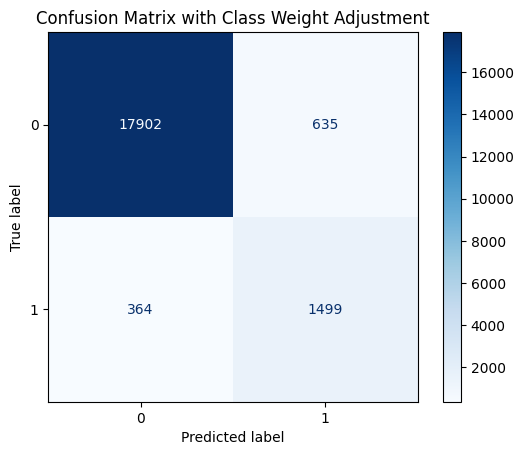

Classification Report with Class Weight Adjustment:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18537
           1       0.70      0.80      0.75      1863

    accuracy                           0.95     20400
   macro avg       0.84      0.89      0.86     20400
weighted avg       0.95      0.95      0.95     20400

[[17902   635]
 [  364  1499]]


In [23]:
# Update XGBoost parameters with class weights
class_weight = {0: 1, 1: 3}  # Experiment with weights
tuned_model = XGBClassifier(
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=class_weight[1] / class_weight[0],
    n_estimators=grid_search.best_params_['n_estimators'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth']
)

# Train with updated class weights
tuned_model.fit(X_train_resampled, y_train_resampled)

# Predict and evaluate
y_pred_weighted = tuned_model.predict(X_test)

# Confusion matrix for weighted model
cm_weighted = confusion_matrix(y_test, y_pred_weighted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_weighted, display_labels=tuned_model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix with Class Weight Adjustment")
plt.show()

# Print classification report
print("Classification Report with Class Weight Adjustment:")
print(classification_report(y_test, y_pred_weighted))

print(cm_weighted)

XGBoost, after tuning, is a clear improvement over logistic regression for this problem:

1) It delivers higher precision, accuracy, and a balanced F1-score.

2) It reduces the number of missed diabetic cases (false negatives) compared to its untuned version and logistic regression.However, some false positives persist, and the model might benefit from

3) Fine-tuning hyperparameters further.
Threshold tuning for specific business requirements.

4) Exploring ensemble methods (e.g., Voting Classifier) to combine strengths of XGBoost and other models.

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

nn_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train_resampled.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Results:")
print(classification_report(y_test, y_pred_nn))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8796 - loss: 0.2588 - val_accuracy: 0.8771 - val_loss: 0.2456
Epoch 2/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9037 - loss: 0.1985 - val_accuracy: 0.8612 - val_loss: 0.2743
Epoch 3/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9085 - loss: 0.1897 - val_accuracy: 0.8845 - val_loss: 0.2301
Epoch 4/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9106 - loss: 0.1824 - val_accuracy: 0.8782 - val_loss: 0.2507
Epoch 5/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9127 - loss: 0.1770 - val_accuracy: 0.8715 - val_loss: 0.2431
Epoch 6/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9135 - loss: 0.1776 - val_accuracy: 0.9049 - val_loss: 0.1991
Epoch 7/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9153 - loss: 0.1733 - val_accuracy: 0.8751 - val_loss: 0.2438
Epoch 8/10
3714/3714 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9164 - loss: 0.1

In [25]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.1 MB/s eta 0:00:00


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras_tuner import Hyperband

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=16),
                    activation='relu', input_dim=X_train_resampled.shape[1]))

    # Add additional hidden layers dynamically
    for i in range(hp.Int('num_layers', 1, 3)):  # Allow up to 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=16, max_value=128, step=16),
                        activation=hp.Choice('activation', ['relu', 'tanh'])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [27]:
from keras_tuner import Hyperband

tuner = Hyperband(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_epochs=10,  # Maximum number of epochs to train
    directory='my_dir',
    project_name='nn_hyperparameter_tuning'
)

tuner.search(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)


Trial 30 Complete [00h 02m 28s]
val_accuracy: 0.9072765111923218

Best val_accuracy So Far: 0.9576265215873718
Total elapsed time: 00h 30m 52s


Challenges of NN:

Recall for Class 1 (73%) is still lower than logistic regression's (88%), potentially missing some positive cases.

Computational cost of training and hyperparameter tuning for NN is significantly higher.

In [30]:
y_pred_nn = (best_model.predict(X_test) > 0.5).astype("int32")
print("Tuned Neural Network Results:")
print(classification_report(y_test, y_pred_nn))
print(confusion_matrix(y_test, y_pred_nn))

Tuned Neural Network Results:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18537
           1       0.91      0.73      0.81      1863

    accuracy                           0.97     20400
   macro avg       0.94      0.86      0.90     20400
weighted avg       0.97      0.97      0.97     20400

[[18401   136]
 [  510  1353]]


NN achieved the highest overall accuracy (97%) after tuning, comparable to XGBoost.

Precision for Class 1 is better than logistic regression (91% vs. 43%) and similar to XGBoost.

Best suited for scenarios where precision (reducing false positives) is critical.

In [41]:
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize individual models
xgb_model = XGBClassifier(eval_metric='logloss', **grid_search.best_params_)  # Replace with the best parameters from grid search
log_reg = LogisticRegression(class_weight='balanced')  # Handles imbalanced classes
nn_model = MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=300, random_state=42)  # Neural network

# Create Voting Classifier with adjusted weights (higher weight to NN if it performs better for class 1)
voting_clf = VotingClassifier(
    estimators=[('xgb', xgb_model), ('lr', log_reg), ('nn', nn_model)],
    voting='soft',  # Use probabilities for better calibration
    weights=[1, 1, 2]  # Give higher weight to NN if it performs better for class 1
)

# Train the Voting Classifier
voting_clf.fit(X_train_resampled, y_train_resampled)

# Adjusting the threshold to reduce false negatives (FN) for class 1 (diabetic)
y_pred_prob = voting_clf.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_pred_prob >= 0.3).astype(int)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))


Confusion Matrix:
 [[16269  2268]
 [  125  1738]]

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     18537
           1       0.43      0.93      0.59      1863

    accuracy                           0.88     20400
   macro avg       0.71      0.91      0.76     20400
weighted avg       0.94      0.88      0.90     20400



Strengths:

1)The voting classifier effectively captures most positive cases, minimizing false negatives.

2) For negative cases, the model rarely misclassifies, leading to a very low false-positive rate.

3)Though the performance is satisfactory, the accuracy is slightly lower compared to the tuned XGBoost (95%-97%) and Neural Network (97%).

Challenges:

1) While recall is high for positive cases, the low precision indicates a significant number of false positives.

2) Though the performance is satisfactory, the accuracy is slightly lower compared to the tuned XGBoost (95%-97%) and Neural Network (97%).
